In [1]:
import numpy as np
import matplotlib.pyplot as plt

# controlled variables
the motor used as a reference was spinning the same direction to minimise any effects of inefficiencies from runing the ESC/motor backwards
the same audio setup of a phone close to the motor was used. This was done by using the same phone so the microphone profile was the same, and not changing equiptment on the drone

# independant variable
the independant variable was the PWM value sent to the motor
to make this more repeatable, the motor was taken up to a certain value. This was recorded.
When the other motor was tested, the PWM value was exactly matched 

THE CODE WAS TAKEN AT 75% ALREADY SO ANY CHANGES ARE ON TOP OF THAT

In [2]:
# store the values, normal is the ESC we were give and weird is the ESC we bought

rpms = [1250, 1413, 1575, 1749, 1815]

reference = [7.6, 17.0, 25.0, 32.4, 38.0]
experimental = [17.6, 26.4, 30.5, 37.2, 40.3]

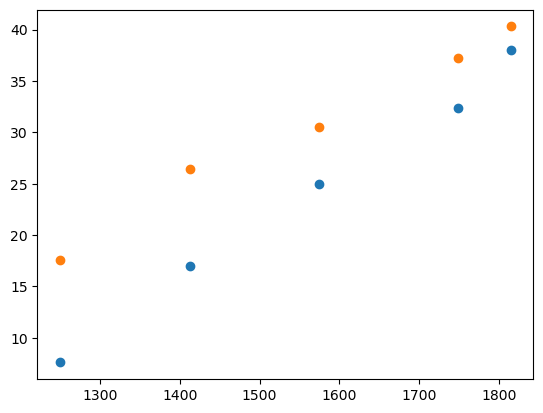

In [3]:
# show the raw data

plt.scatter(rpms, reference)
plt.scatter(rpms, experimental)

In [4]:
import scipy.optimize

In [5]:
def f(x, a, b):
    '''linear fit'''
    return a*x + b

# fit the curves to the data points
referencefit=scipy.optimize.curve_fit(f, rpms, reference)[0]
experimentalfit=scipy.optimize.curve_fit(f, rpms, experimental)[0]
print(f"reference = {referencefit[0]}x+{referencefit[1]}")
print(f"experimental = {experimentalfit[0]}x+{experimentalfit[1]}")

reference = 0.05160801758716671x+-56.529150646367995
experimental = 0.03826244105821133x+-29.30471302765263


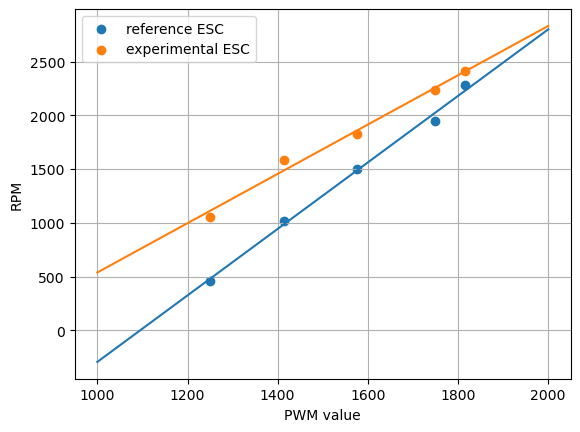

In [6]:
# show the data in RPM and the fitted lines. Extend to 2000 value of PWM 

x=np.linspace(1000, 2000)

plt.scatter(rpms, [i*60 for i in reference], label="reference ESC")
plt.plot(x, f(x, referencefit[0], referencefit[1])*60)

plt.scatter(rpms, [i*60 for i in experimental], label="experimental ESC")
plt.plot(x, f(x, experimentalfit[0], experimentalfit[1])*60)


plt.xlabel("PWM value")
plt.ylabel("RPM")
plt.legend()
plt.grid()
plt.savefig("curves.png")

this seems right because at a pwm value of 2000, the wave is full which means the ESC is pushing 30A, where both should give the same RPM

In [7]:
experimentalfit[0]/referencefit[0]

0.7414049763408467

# TEST 2: M4 HAS BEEN ADJUSTED SO IT SHOULD ROUGHLY MATCH M1

In [8]:
import scipy.fft

# changes from test 1
nut on top to stop the fiducial from flying off
throttle map changed

# aims
show that the PWM vs frequency curve has changed

In [9]:
rpms = [1300, 1500, 1700, 2000]

weird = [22.5, 28.3, 32.3, 39.0]
normal = [10.7, 22.2, 32.8, 39.3]

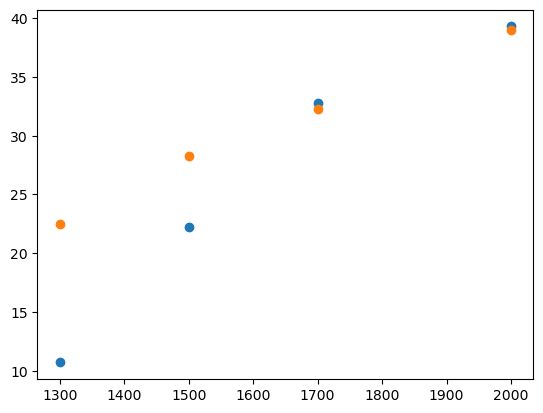

In [10]:
# show the raw data

plt.scatter(rpms, normal)
plt.scatter(rpms, weird)

In [11]:
def f(x, a, b):
    '''linear fit'''
    return a*x + b

# fit the curves to the data points
normalfit=scipy.optimize.curve_fit(f, rpms, normal)[0]
weirdfit=scipy.optimize.curve_fit(f, rpms, weird)[0]
print(f"normal = {normalfit[0]}x+{normalfit[1]}")
print(f"weird = {weirdfit[0]}x+{weirdfit[1]}")

normal = 0.04091588805030392x+-40.23831808174386
weird = 0.02316822431258389x+-7.123364507948826


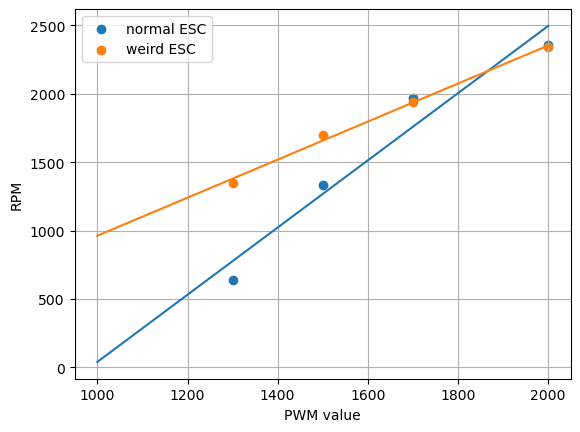

In [12]:
# show the data in RPM and the fitted lines. Extend to 2000 value of PWM for when it is a full wave

x=np.linspace(1000, 2000)

plt.scatter(rpms, [i*60 for i in normal], label="normal ESC")
plt.plot(x, f(x, normalfit[0], normalfit[1])*60)

plt.scatter(rpms, [i*60 for i in weird], label="weird ESC")
plt.plot(x, f(x, weirdfit[0], weirdfit[1])*60)

plt.xlabel("PWM value")
plt.ylabel("RPM")
plt.legend()
plt.grid()

In [13]:
weirdfit[0]/normalfit[0]

0.5662402899357771